In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("tab10")
sns.set_style("darkgrid")

In [121]:
df = pd.read_csv("salida.csv")
df.head(20)

,hilos,f,c,acceso,tiempo
0,1,500,500,Filas,0.001728
1,1,500,500,Columnas,0.001487
2,1,2500,2500,Filas,0.042314
3,1,2500,2500,Columnas,0.063611
4,1,4500,4500,Filas,0.137530
5,1,4500,4500,Columnas,0.215693
6,1,6500,6500,Filas,0.286875
7,1,6500,6500,Columnas,0.477083
8,1,8500,8500,Filas,0.492285
9,1,8500,8500,Columnas,0.835059


In [122]:
df_grouped = df.groupby(['hilos','f', 'c', 'acceso'])["tiempo"].mean().reset_index()
df_grouped

,hilos,f,c,acceso,tiempo
0,1,500,500,Columnas,0.001609
1,1,500,500,Filas,0.001757
2,1,2500,2500,Columnas,0.064417
3,1,2500,2500,Filas,0.042578
4,1,4500,4500,Columnas,0.218931
5,1,4500,4500,Filas,0.138370
6,1,6500,6500,Columnas,0.474854
7,1,6500,6500,Filas,0.290677
8,1,8500,8500,Columnas,0.841881
9,1,8500,8500,Filas,0.493890


In [123]:
df_grouped.groupby(["acceso"])["tiempo"].mean()

acceso
Columnas    0.133533
Filas       0.080173
Name: tiempo, dtype: float64

In [124]:
df_grouped.groupby(["acceso"])["tiempo"].std()

acceso
Columnas    0.182093
Filas       0.107352
Name: tiempo, dtype: float64

In [125]:
df_grouped["nroComponentes"] = df_grouped["f"] * df_grouped["c"]

In [126]:
dfColumnas = df_grouped[df_grouped["acceso"].isin(["Columnas"])]
dfFilas = df_grouped[df_grouped["acceso"].isin(["Filas"])]

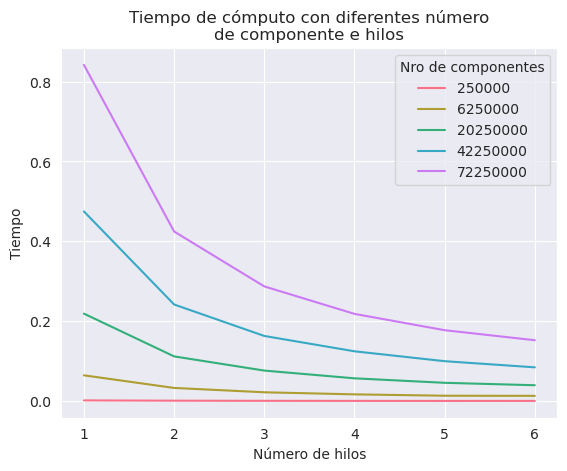

In [144]:
colores = sns.color_palette("husl", n_colors=len(dfColumnas['nroComponentes'].unique()))
sns.lineplot(dfColumnas, hue="nroComponentes", y="tiempo", x="hilos", palette=colores)
plt.title("Tiempo de cómputo con diferentes número\nde componente e hilos")
plt.ylabel("Tiempo")
plt.xlabel("Número de hilos")
plt.legend(title="Nro de componentes")
plt.savefig("imgs/salida1.png")
plt.show()

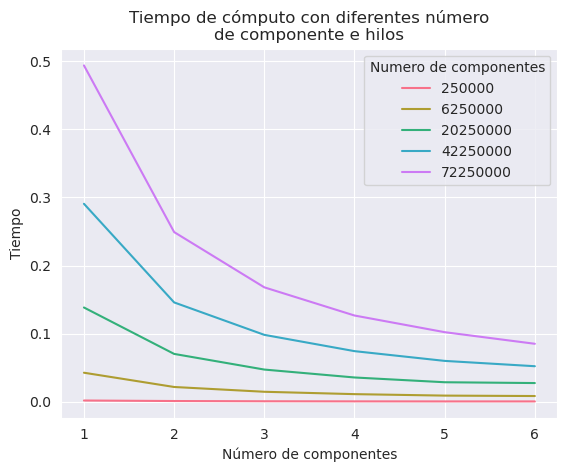

In [142]:
colores = sns.color_palette("husl", n_colors=len(dfFilas['nroComponentes'].unique()))
sns.lineplot(dfFilas, hue="nroComponentes", y="tiempo", x="hilos", palette=colores)
plt.title("Tiempo de cómputo con diferentes número\nde componente e hilos")
plt.ylabel("Tiempo")
plt.xlabel("Número de hilos")
plt.legend(title="Nro de componentes")
plt.savefig("imgs/salida2.png")
plt.show()

In [129]:
dfSec = df_grouped[df_grouped["hilos"] == 1]
dfSec

,hilos,f,c,acceso,tiempo,nroComponentes
0,1,500,500,Columnas,0.001609,250000
1,1,500,500,Filas,0.001757,250000
2,1,2500,2500,Columnas,0.064417,6250000
3,1,2500,2500,Filas,0.042578,6250000
4,1,4500,4500,Columnas,0.218931,20250000
5,1,4500,4500,Filas,0.138370,20250000
6,1,6500,6500,Columnas,0.474854,42250000
7,1,6500,6500,Filas,0.290677,42250000
8,1,8500,8500,Columnas,0.841881,72250000
9,1,8500,8500,Filas,0.493890,72250000


In [130]:
dfPar = df_grouped[df_grouped["hilos"] != 1]
dfPar

,hilos,f,c,acceso,tiempo,nroComponentes
10,2,500,500,Columnas,0.000881,250000
11,2,500,500,Filas,0.001003,250000
12,2,2500,2500,Columnas,0.032835,6250000
13,2,2500,2500,Filas,0.021625,6250000
14,2,4500,4500,Columnas,0.111827,20250000
15,2,4500,4500,Filas,0.070204,20250000
16,2,6500,6500,Columnas,0.241815,42250000
17,2,6500,6500,Filas,0.145828,42250000
18,2,8500,8500,Columnas,0.424599,72250000
19,2,8500,8500,Filas,0.249131,72250000


In [131]:
dfMerged = dfSec.merge(dfPar, on=["nroComponentes", "acceso"], suffixes=("_sec", "_par"))
dfMerged["speedup"] = dfMerged["tiempo_sec"] / dfMerged["tiempo_par"]

In [132]:
dfMergedFilas = dfMerged[dfMerged["acceso"] == "Filas"]
dfMergedColumnas = dfMerged[dfMerged["acceso"] == "Columnas"]

In [133]:
dfMergedColumnas["hilos_par"].unique()

array([2, 3, 4, 5, 6])

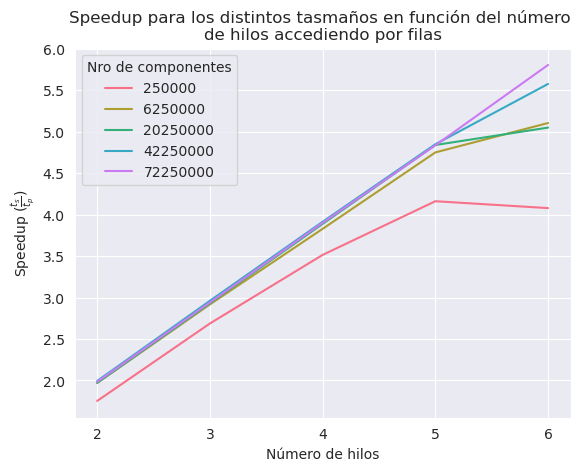

In [139]:
colores = sns.color_palette("husl", n_colors=len(dfMergedFilas['nroComponentes'].unique()))
sns.lineplot(dfMergedFilas, x="hilos_par", y="speedup", hue="nroComponentes", palette=colores)
plt.title("Speedup para los distintos tasmaños en función del número \nde hilos accediendo por filas")
plt.xlabel("Número de hilos")
plt.ylabel(r"Speedup ($\frac{t_s}{t_p}$)")
plt.xticks(dfMergedColumnas["hilos_par"].unique())
plt.legend(loc="upper left", title="Nro de componentes")
plt.savefig("imgs/salida3.png")
plt.show()

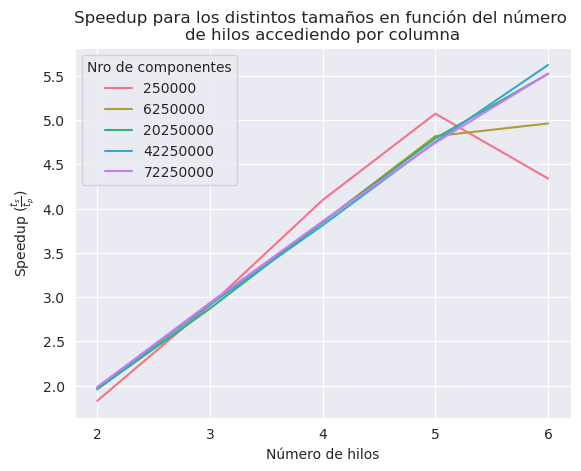

In [140]:
colores = sns.color_palette("husl", n_colors=len(dfMergedColumnas['nroComponentes'].unique()))
sns.lineplot(dfMergedColumnas, x="hilos_par", y="speedup", hue="nroComponentes", palette=colores)
plt.title("Speedup para los distintos tamaños en función del número \nde hilos accediendo por columna")
plt.xlabel("Número de hilos")
plt.ylabel(r"Speedup ($\frac{t_s}{t_p}$)")
plt.xticks(dfMergedColumnas["hilos_par"].unique())
plt.legend(loc="upper left", title="Nro de componentes")
plt.savefig("imgs/salida4.png")
plt.show()